# Machine Learning Models

**(Excute this file on  the cloud) **

In this part, we read the **elbow** data after preprocessing and then train the following **traditional ML models**:

* 1. K-nearest-neighbors (KNN)
* 2. Random Forest (RF)
* 3. Support Vector Machine (SVM)

<h1 style="text-align:right"> $\mathcal{ZLF}$ </h1>

## Preparation

In [1]:
# import packages
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from skimage.transform import resize
from PIL import Image
from skimage.filters import sobel
from scipy import ndimage

%matplotlib inline

In [0]:
# before use data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# get the work directory
os.chdir('/content/gdrive/My Drive/paper/processed_data')
# show the files in the wd
print('The work directory contains:')
!ls

The work directory contains:
elbow_test.csv	  forearm_test.csv   humerus_test.csv	 whole_test.csv
elbow_train.csv   forearm_train.csv  humerus_train.csv	 whole_train.csv
finger_test.csv   hand_test.csv      shoulder_test.csv	 wrist_test.csv
finger_train.csv  hand_train.csv     shoulder_train.csv  wrist_train.csv


##  Read the data

In [2]:
# the function to read the data
def read_my_data(human_part):
  """
  Input: 
  human_part: string of human part
  -------
  Output:
  train: Data frame of corresponding train data
  test: Data frame of corresponding test data
  """
  filename_train = human_part + '_train.csv'
  filename_test = human_part + '_test.csv'
  
  train = pd.read_csv(filename_train).iloc[:,1:] # drop the index
  test = pd.read_csv(filename_test).iloc[:,1:]
  
  return train, test

In [3]:
# read the data
# whole_train, whole_test = read_my_data('whole')
elbow_train, elbow_test = read_my_data('elbow')
# finger_train, finger_test = read_my_data('finger')
# forearm_train, forearm_test = read_my_data('forearm')
# hand_train, hand_test = read_my_data('hand')
# humerus_train, humerus_test = read_my_data('humerus')
# shoulder_train, shoulder_test = read_my_data('shoulder')
# wrist_train, wrist_test = read_my_data('wrist')

In [4]:
# change the input here to perform models in different dataset 
train_data = elbow_train
test_data = elbow_test

In [5]:
test_data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,label
0,-9.745075,2.083610,-5.738908,0.104210,-4.447076,-2.198514,-0.554143,2.036366,-1.543699,-1.977809,0
1,-10.239817,12.263109,-2.319746,-8.015372,2.473136,3.699439,-1.925978,-1.630591,7.220460,-0.194791,0
2,-4.151651,-2.143759,3.718345,0.889420,2.691137,0.425137,0.621480,-3.226980,-1.503880,-0.880205,0
3,-1.562925,-3.134990,-0.090834,1.740719,-3.328060,0.675849,1.701309,1.597572,-1.609520,-0.978766,1
4,44.032904,1.581672,4.920160,4.169699,21.681211,7.878354,2.696793,-0.661694,6.142018,4.005003,0


In [6]:
test_data.shape

(540, 11)

In [7]:
# split X and y
X_train = train_data.iloc[:,0:-1]
y_train = train_data['label']
X_test = test_data.iloc[:,0:-1]
y_test = test_data['label']

# concat to obtain X and y
X = pd.concat([X_train,X_test], ignore_index = True)
y = pd.concat([y_train,y_test], ignore_index = True)

## Model 1. KNN

### 1.1. Random search

In [0]:
# this function is to print the result of random search
def report(results, n_top=6):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier 

# build a classifier
knn = KNeighborsClassifier()


# specify parameters and distributions to sample from
param_dist = {"n_neighbors": sp_randint(4, 12),
              "algorithm": ['ball_tree','kd_tree'],
              "leaf_size":[30, 50],
              "p":[1,2]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(knn, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 27.33 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.650 (std: 0.007)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 11, 'p': 1}

Model with rank: 1
Mean validation score: 0.650 (std: 0.007)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 11, 'p': 1}

Model with rank: 3
Mean validation score: 0.647 (std: 0.014)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 8, 'p': 1}

Model with rank: 4
Mean validation score: 0.645 (std: 0.004)
Parameters: {'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 11, 'p': 2}

Model with rank: 4
Mean validation score: 0.645 (std: 0.004)
Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 11, 'p': 2}

Model with rank: 6
Mean validation score: 0.643 (std: 0.007)
Parameters: {'algorithm': 'kd_tree', 'leaf_size': 50, 'n_neighbors': 9, 'p': 2}



### 1.2. Fit the best model

In [0]:
# fit the best model
from sklearn.neighbors import KNeighborsClassifier 
knn_best = KNeighborsClassifier(n_neighbors=11,
                                leaf_size = 50,
                                algorithm='ball_tree',
                                p=1)
knn_best.fit(X_train, y_train)
knn_pred = knn_best.predict(X_test)

# test the model
accuracy = knn_best.score(X_test, y_test)
print('Test Accuracy of the best knn model: ' + str(accuracy))

Test Accuracy of the best knn model: 0.6611111111111111


### 1.3. Confusion Matrix

In [0]:
# define Confusion Matrix function
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    -------
    Input:
    cm: Confusion matrix
    classes: Types of labels
    normalize: Perform normalization if True
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


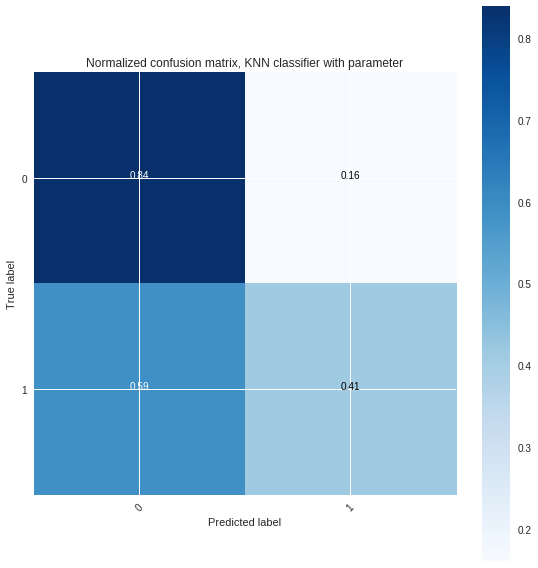

In [0]:
#def class_name
class_names = np.unique(test_data['label']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, knn_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize = (8,8)) #add dpi = 400 or other numbers if high resolution image is required
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, KNN classifier with parameter')

### 1.4. ROC curve & AUC

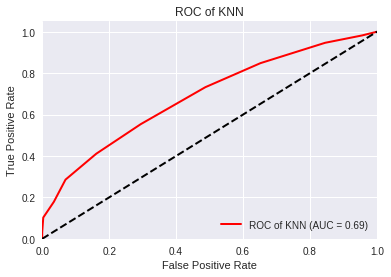

In [0]:
from sklearn.metrics import roc_curve, auc

# calculate fpr, tpr, etc
y_score = knn_best.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1]) 
roc_auc = auc(fpr, tpr)

# plot the ROC
plt.plot(fpr, tpr, color='red', lw=2, label = 'ROC of KNN (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of KNN')
plt.legend(loc="lower right");

## Model 2. SVM

### 2.1. Random Search

In [10]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# build a classifier
svm = SVC(probability = True)

# specify parameters and distributions to sample from
param_dist = {"kernel":['rbf', 'poly', 'sigmoid'], "gamma":[1, 0.1, 0.05, 0.01], "C":[1, 20, 50, 100]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(svm, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

### 2.2. Fit the best model

In [8]:
# fit the best model
from sklearn.svm import SVC

svm_best = SVC(kernel='rbf', gamma = 0.01, C = 1, probability = True)
svm_best.fit(X_train, y_train)
svm_pred = svm_best.predict(X_test)

# test the model
accuracy = svm_best.score(X_test, y_test)
print('Test Accuracy of the best SVM model: ' + str(accuracy))

Test Accuracy of the best SVM model: 0.7037037037037037


### 2.3. Confusion Matrix

In [9]:
# define Confusion Matrix function
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    -------
    Input:
    cm: Confusion matrix
    classes: Types of labels
    normalize: Perform normalization if True
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


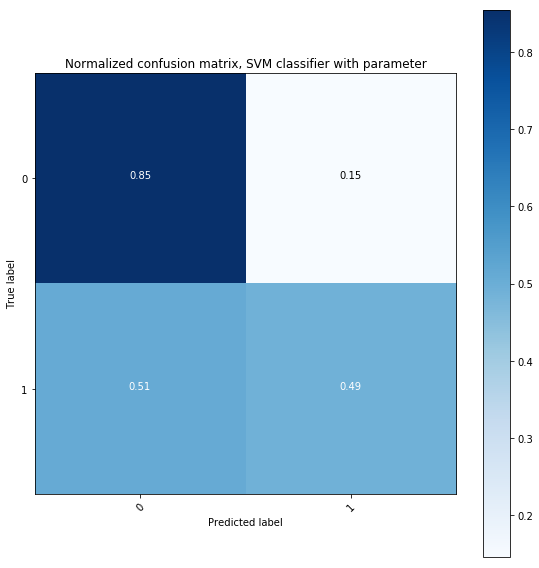

In [10]:
#def class_name
class_names = np.unique(test_data['label']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize = (8,8)) #add dpi = 400 or other numbers if high resolution image is required
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, SVM classifier with parameter')

### 2.4. ROC curve & AUC

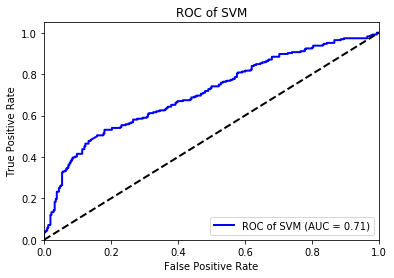

In [11]:
from sklearn.metrics import roc_curve, auc

# calculate fpr, tpr, etc
y_score = svm_best.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1]) 
roc_auc = auc(fpr, tpr)

# plot the ROC
plt.plot(fpr, tpr, color='blue', lw=2, label = 'ROC of SVM (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVM')
plt.legend(loc="lower right");

## Model 3. Random Forest

### 3.1. Random search

In [8]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [13]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier
rf = RandomForestClassifier(n_estimators=20)

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(5, 10),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

KeyboardInterrupt: 

### 3.2. Fit the best model

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_best = RandomForestClassifier(n_estimators=20,
                                 criterion='entropy', 
                                 max_features=13, 
                                 min_samples_split=5,
                                 bootstrap=False, 
                                 max_depth=None)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_test)

# test the model
accuracy = rf_best.score(X_test, y_test)
print('Test Accuracy of the best knn model: ' + str(accuracy))

### 3.3. Confusion Matrix

In [0]:
# define Confusion Matrix function
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    -------
    Input:
    cm: Confusion matrix
    classes: Types of labels
    normalize: Perform normalization if True
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
#def class_name
class_names = np.unique(test_data['label']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize = (8,8)) #add dpi = 400 or other numbers if high resolution image is required
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, Random Forest classifier with parameter')

### 3.4. ROC curve & AUC

In [0]:
from sklearn.metrics import roc_curve, auc

# calculate fpr, tpr, etc
y_score = rf_best.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1]) 
roc_auc = auc(fpr, tpr)

# plot the ROC
plt.plot(fpr, tpr, color='red', lw=2, label = 'ROC of RF (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of RF')
plt.legend(loc="lower right");

In [0]:
!umount -f /content/gdrive/My Drive/paper/processed_data